# Week 6 - Bivariate Analysis, part 2

# 1. Lesson: no lesson this week

# 2. Weekly graph question

Suppose you wanted to show the nitrate and phosphate level in a water sample.  What are the advantages and disadvantages of showing this as an area plot, as opposed to two separate line graphs?  How would you adjust the graphs shown to improve the presentation?

**What are the advantages and disadvantages of showing this as an area plot, as opposed to two separate line graphs?**

Since both nitrate and phosphate contribute to eutrophication, which causes harmful algal blooms and disrupts ecosystem balance, the area plot provides a clear visual representation of the total contribution from both elements. Further, the area plot makes it easier to observe which element was more dominant at different points. For instance, phosphate (Series2) contributed significantly between January and July 2023, then nitrate (Series1) picked up, showing an upward trend from August until the end of the year. However, the area plot is not ideal when it comes to estimating exact nitrate and phosphate levels because small variations in one nutrient might get lost due to the stacking effect. Without checking the baseline (% of eutrophic value), the contribution of an individual element can be over- or underestimated.

On the other hand, two separate line graphs provide a more precise comparison of individual trends, capturing fluctuations in both nitrate and phosphate levels. This approach avoids the stacking issue, as each dataset is displayed independently without interference. A main advantage of the line graphs is that they retain the % of eutrophic value reference, represented on the y-axis. The % of eutrophic value shows how each element contributes to eutrophication, which is importatn in assessing whether either nutrient alone exceeded a critical level.

In [30]:
import numpy as np
import seaborn as sns
import pandas as pd

/tmp/ipykernel_1775/2149468501.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Nitrate level (% of eutrophic value)')

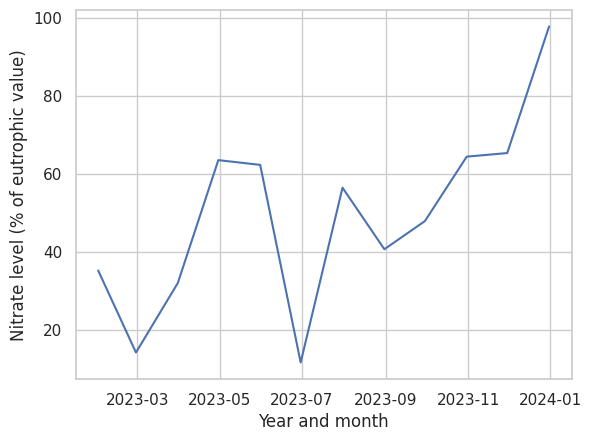

In [31]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")

/tmp/ipykernel_1775/1726504607.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Phosphate level (% of eutrophic value)')

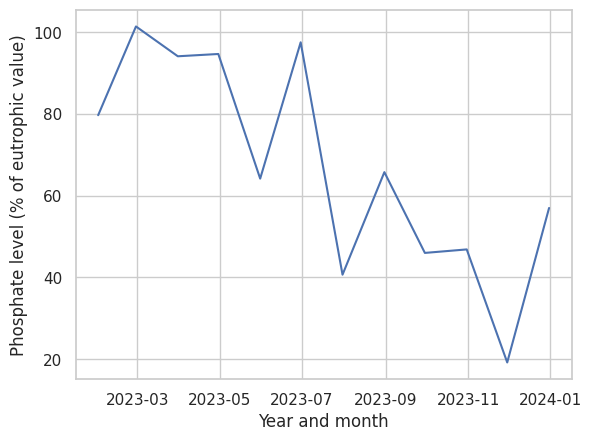

In [32]:
np.random.seed(1)
time_series_2 =  100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series_2)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")

<Axes: >

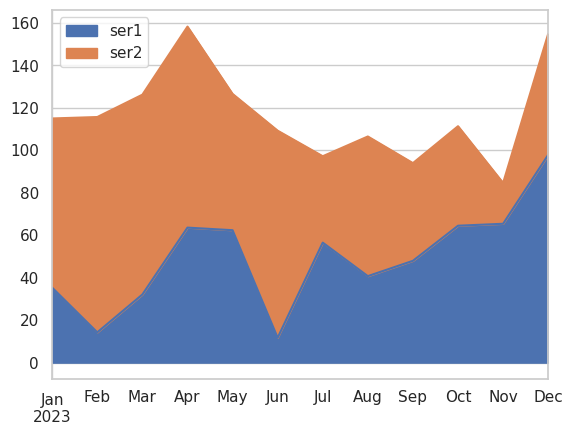

In [33]:
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()

**How would you adjust the graphs shown to improve the presentation?**

This adjusted graph has clear labels, a readable legend, and a grid, making it easier to interpret. The graph shows fluctuations in Nitrate and Phosphate levels over the year, with more noticeable seasonal variations than those observed in the individual graphs. Phosphate levels exhibit sharp peaks in March–April and June–July, followed by steep declines, indicating high volatility. In contrast, Nitrate levels display a more gradual pattern, with a noticeable increase from mid-year onward, peaking in December. At several points, the two nutrients appear to follow inverse trends, particularly in March–April, May–June, and October–November, where one rises as the other falls. Overall, while Phosphate levels fluctuate unpredictably, Nitrate levels appear to rise more consistently in the latter half of the year. However, when looking at the entire year, the two nutrients often exhibit opposite trends at different points.

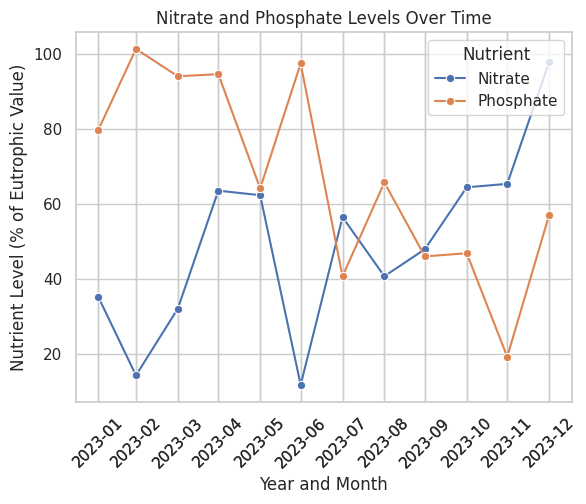

In [34]:
import matplotlib.pyplot as plt

# Set seed and define number of months
numdates = 12
np.random.seed(0)

# Generate time series data
time_series = 100 * (np.random.normal(size=numdates) / 5 + np.arange(numdates) / 16)
np.random.seed(1)
time_series_2 = 100 * (1 - (np.random.normal(size=numdates) / 8 + np.arange(numdates) / 16))

# Generate date range
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='ME')

# Create DataFrame
df = pd.DataFrame({"Date": datearray, "Nitrate": time_series, "Phosphate": time_series_2})
df = df.melt("Date", var_name="Nutrient", value_name="Level")

# Plot
sns.set_theme(style="whitegrid") 
ax = sns.lineplot(data=df, x="Date", y="Level", hue="Nutrient", marker="o")

# Rotate x-axis labels
ax.set_xticks(df["Date"])
ax.set_xticklabels(df["Date"].dt.strftime('%Y-%m'), rotation=45) 

# Labels and title
ax.set_xlabel("Year and Month")
ax.set_ylabel("Nutrient Level (% of Eutrophic Value)")
ax.set_title("Nitrate and Phosphate Levels Over Time")

plt.show()

Like the first adjusted graph, this one below has also clear labels, a readable legend, and a grid, making it easier to interpret. The x-axis labels are well-rotated to prevent overlap, and the color scheme is easy on the eyes.

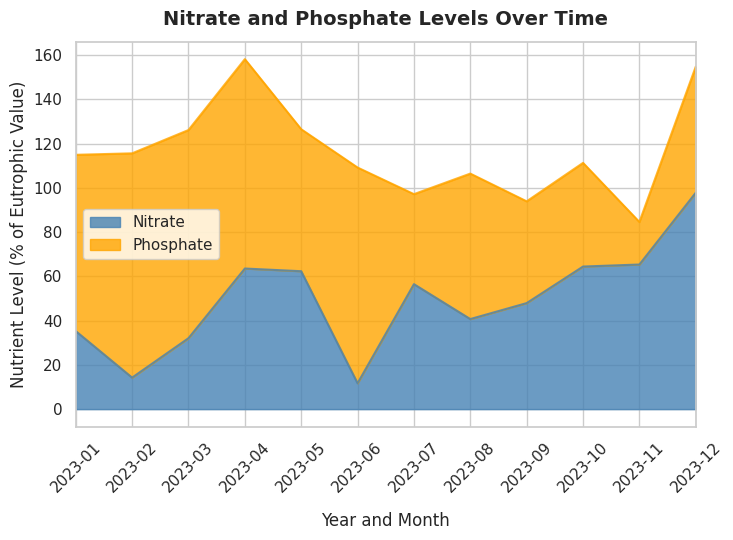

In [35]:
# Set seed and define number of months
numdates = 12
np.random.seed(0)

# Generate time series data
time_series = 100 * (np.random.normal(size=numdates) / 5 + np.arange(numdates) / 16)
np.random.seed(1)
time_series_2 = 100 * (1 - (np.random.normal(size=numdates) / 8 + np.arange(numdates) / 16))

# Generate date range 
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='ME')

# Create DataFrame
df = pd.DataFrame({'Nitrate': time_series, 'Phosphate': time_series_2}, index=datearray)

# Area plot
ax = df.plot.area(alpha=0.8, figsize=(8, 5), color=['steelblue', 'orange'])

# Labels and title
ax.set_xlabel("Year and Month", labelpad=12)
ax.set_ylabel("Nutrient Level (% of Eutrophic Value)")
ax.set_title("Nitrate and Phosphate Levels Over Time", fontsize=14, fontweight='bold', pad=12)

# Rotate x-axis labels
ax.set_xticks(df.index) 
ax.set_xticklabels(df.index.strftime('%Y-%m'), rotation=45)  

ax.grid(True, linestyle="-")

plt.show()


# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Find correlations between pairs of variables.

- Draw scatterplots, especially when the correlation is large.

- Draw pairplots.

- Draw line graphs and/or area graphs when there is date or time data together with numerical data.



### **1. Vehicle Insurance Fraud Detection**


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
# Loading data
fraud_df = pd.read_csv("vehicle_insurance_fraud_detection.csv")

In [38]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  PolicyNumber          15420 non-null

**1.1 Correlations between pairs of variables**

Finding correlations between pairs of variables in this dataset is challenging due to the large number of columns. A practical approach is to focus on the most relevant variables that reveal clear, meaningful patterns for identifying fraudulent cases.

In [39]:
# Find correlations between pairs of numerical variables
correlation_matrix = fraud_df.select_dtypes(include=["number"]).corr()
print(correlation_matrix)

                    WeekOfMonth  WeekOfMonthClaimed       Age  PolicyNumber  \
WeekOfMonth            1.000000            0.275400 -0.004810     -0.007797   
WeekOfMonthClaimed     0.275400            1.000000  0.001859      0.011665   
Age                   -0.004810            0.001859  1.000000      0.025944   
PolicyNumber          -0.007797            0.011665  0.025944      1.000000   
RepNumber              0.005283            0.008908 -0.007063      0.008990   
Deductible            -0.003993            0.005457  0.069420      0.002133   
DriverRating          -0.016817           -0.000048  0.001668     -0.012312   
Year                  -0.003906            0.012175  0.025197      0.936513   

                    RepNumber  Deductible  DriverRating      Year  
WeekOfMonth          0.005283   -0.003993     -0.016817 -0.003906  
WeekOfMonthClaimed   0.008908    0.005457     -0.000048  0.012175  
Age                 -0.007063    0.069420      0.001668  0.025197  
PolicyNumber    

For a better representation, the numerical variables are organized in a heatmap, which showed weak correlations between the numerical variables. Only PolicyNumber and Year have a perfect positive correlation. This is expected because newer policies get higher numbers (see below).

<Axes: >

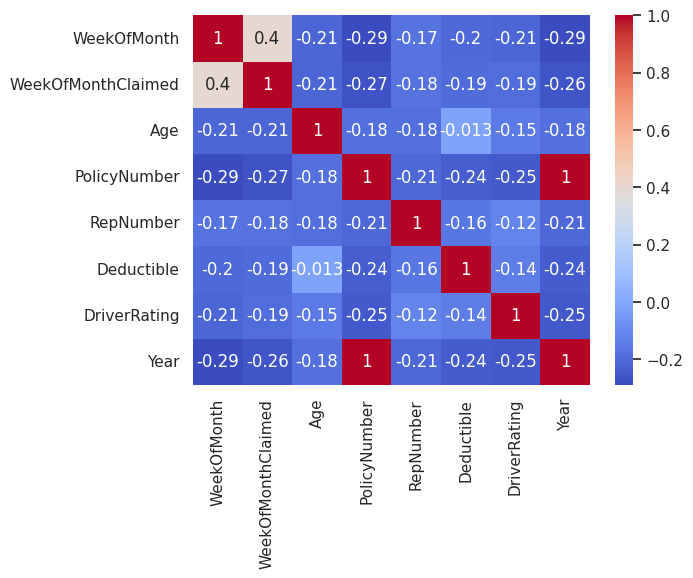

In [40]:
# Heatmap
sns.heatmap(correlation_matrix.corr(),annot=True,cmap='coolwarm') 

In [41]:
fraud_df[["PolicyNumber", "Year"]]

,PolicyNumber,Year
0,1,1994
1,2,1994
2,3,1994
3,4,1994
4,5,1994
...,...,...
15415,15416,1996
15416,15417,1996
15417,15418,1996
15418,15419,1996


**1.2 Correlations between mixed variables**

Since the dataset contains multiple categorical variables and the analysis focuses on fraud detection, the following grouped bar charts reveal patterns when compared against the FraudFound column. These patterns were first identified during the univariate analysis in Week 4 but are revisited this week for deeper bivariate analysis and practical conclusions.

1.2.1 Grouped histogram of Age: 

- The box plot below shows that the median age for fraudulent claims is slightly lower than for non-fraudulent claims, which suggests that younger individuals might be more represented in fraud cases.

- Both groups have similar interquartile ranges, meaning the middle 50% of claimants fall within a comparable age range regardless of fraud status. However, there are more outliers in fraudulent claims, especially on the higher end, which means some older individuals are also involved in fraud cases. 

- The mean age, marked by the dashed blue line, is higher than the median for both groups, showing a right-skewed distribution where a few older claimants pull the average upward.

- Previously, in HW4, it was found that one notable outlier is Age = 0, which is unexpected and may indicate data entry errors, misrepresentation, or an anomaly in fraud claims. Notably, this group has a fraud rate of 9.69%, higher than the overall rate of 5.99%, suggesting a greater likelihood of fraud. Age = 0 is also clear in this box plot. 

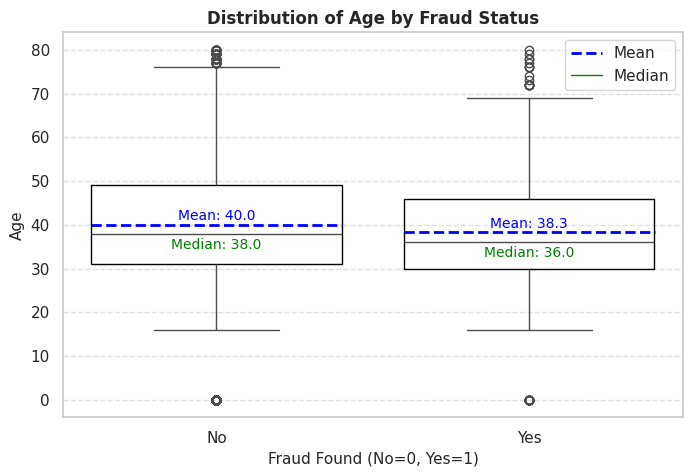

In [42]:
# Create box plot
plt.figure(figsize=(8, 5))
ax = sns.boxplot(x=fraud_df["FraudFound"], y=fraud_df["Age"], boxprops={'facecolor': 'none', 'edgecolor': 'black'})

# Calculate mean and median for each FraudFound category
median_values = fraud_df.groupby("FraudFound")["Age"].median()
mean_values = fraud_df.groupby("FraudFound")["Age"].mean()

for i, (median, mean) in enumerate(zip(median_values, mean_values)):
    ax.text(i, median - 2.5, f"Median: {median:.1f}", va='center', fontsize=10, color='green', ha='center')
    ax.plot([i-0.4, i+0.402], [mean, mean], color='blue', linestyle='--', linewidth=2) 
    ax.text(i, mean + 2, f"Mean: {mean:.1f}", va='center', fontsize=10, color='blue', ha='center')


# Add labels and title
ax.set_title("Distribution of Age by Fraud Status", fontsize=12, fontweight='bold')
ax.set_xlabel("Fraud Found (No=0, Yes=1)", fontsize=11)
ax.set_ylabel("Age", fontsize=11)
ax.grid(axis="y", linestyle="--", alpha=0.6)  

# Add legend
legend_labels = ["Mean", "Median"]
legend_handles = [
    plt.Line2D([0], [0], color='blue', linestyle='--', lw=2),  
    plt.Line2D([0], [0], color='green', lw=1)
]
ax.legend(legend_handles, legend_labels, loc="upper right")

plt.show()

1.2.2. Grouped histogram of Past Number Of Claims:

- The histogram provides only an approximate view of fraud based on past claims. A table (added after the histograms) better represents this correlation. 

- Fraud is highest among those with no past claims (7.8%) and lowest among those with more than four claims (3.4%). 

- Moderate claim history (2 to 4 claims) has a lower fraud rate (5.4%), likely because repeat claimants face more scrutiny and account for more claims overall. This means that some first-time claimants might have a tendency to exploit the system, while those with multiple past claims are less likely to submit fraudulent claims, possibly due to stricter oversight and an established relationship with the insurance company.

1.2.3. Grouped Count Plot of Base Policy:

- Fraudulent cases occur at a slightly higher rate in collision and all-perils policies compared to liability.

- This suggests that more comprehensive policies might be more susceptible to fraudulent claims.

1.2.4. Grouped Count Plot of Rep Number:

- The distribution of fraud cases across different representatives is mostly uniform, but a few stand out with notably higher fraud rates.

- This pattern warrants a closer look (see 1.2.5 below).

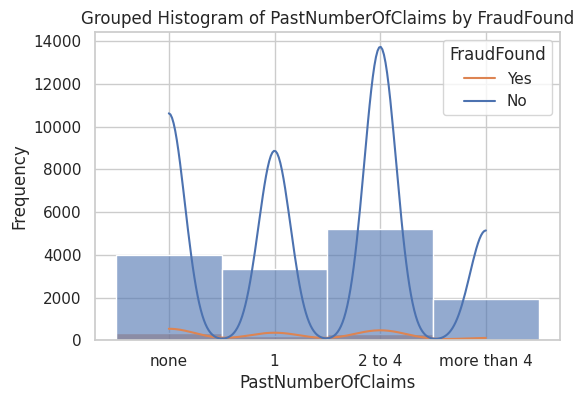

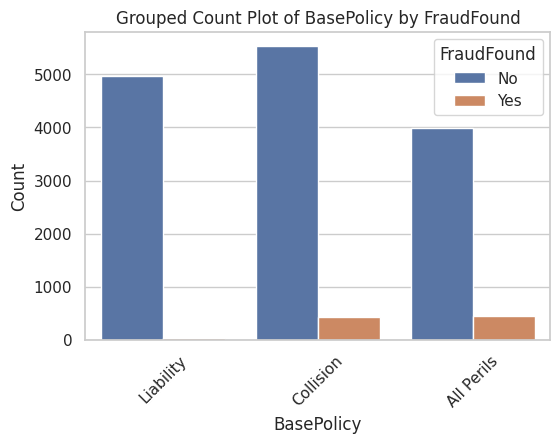

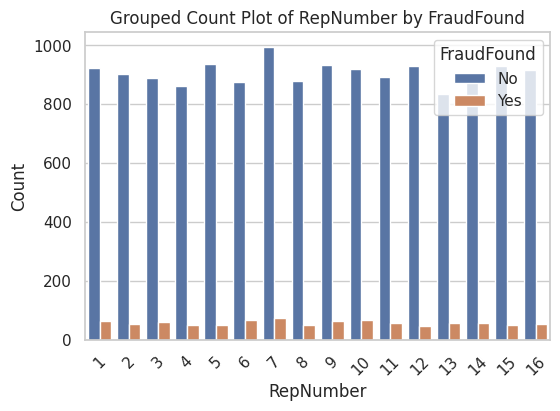

In [43]:
numerical_cols = ["PastNumberOfClaims"]
categorical_cols = ["BasePolicy", "RepNumber"]
group_col = "FraudFound" 

# Convert group column to string for visualization
fraud_df[group_col] = fraud_df[group_col].astype(str)

# Plot grouped histograms for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=fraud_df, x=col, hue=group_col, kde=True, bins=30, alpha=0.6)
    plt.title(f"Grouped Histogram of {col} by {group_col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.legend(labels=["Yes", "No"], title=group_col)
    plt.show()


# Plot grouped bar charts for categorical columns
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=fraud_df, x=col, hue=group_col)
    plt.title(f"Grouped Count Plot of {col} by {group_col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend(labels=["No", "Yes"], title=group_col)
    plt.xticks(rotation=45)  
 
plt.show()

1.2.5 Fraud Rate by RepNumber:

- 50% of representatives processed claims with a fraud rate above the dataset-wide average of 5.99%, which serves as a baseline.

- However, Rep 6, Rep 7, and possibly Rep 10, stood out more than the others, handling a noticeably higher proportion of fraudulent claims.

- While fraudulent cases remain consistently lower than non-fraudulent ones across all reps, these outliers suggest that certain reps may be handling a disproportionate number of fraud cases. This could be due to higher claim volume, increased workload, or gaps in fraud detection training. In a real-life scenario, further investigation may be needed to determine whether these representatives are handling more complex cases, are overburdened, or require additional support in detecting fraudulent activity.

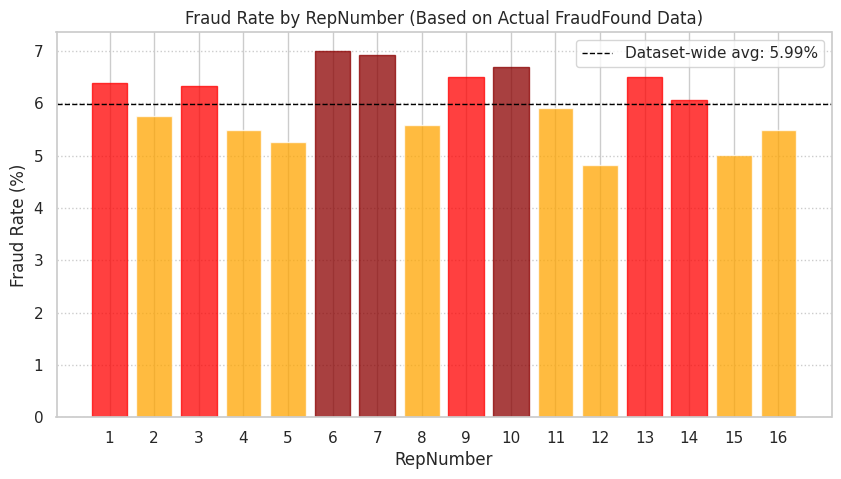

In [45]:
# Load the dataset to ensure the graph is generated correctly
fraud_df = pd.read_csv("vehicle_insurance_fraud_detection.csv")

# FraudFound is treated as a categorical variable
fraud_df["FraudFound"] = fraud_df["FraudFound"].astype(str)

# Filter fraud_df to include only fraudulent claims
fraud_only_df = fraud_df[fraud_df["FraudFound"] == "Yes"]

# Calculate fraud rate per RepNumber
fraud_counts = fraud_only_df["RepNumber"].value_counts().sort_index()
total_counts = fraud_df["RepNumber"].value_counts().sort_index()
fraud_rates = (fraud_counts / total_counts * 100).fillna(0)

# Define dataset-wide fraud rate
baseline_fraud_rate = fraud_df["FraudFound"].value_counts(normalize=True)["Yes"] * 100

# Identify reps with above-average fraud rates
highlight_reps = fraud_rates[fraud_rates > baseline_fraud_rate].index.tolist()

# Key Reps (6, 7, 10) to highlight more strongly
key_reps = [6, 7, 10]

# Plot the fraud rate per RepNumber
plt.figure(figsize=(10, 5))
bars = plt.bar(fraud_rates.index, fraud_rates.values, color="orange", alpha=0.75)

# Highlight specific reps
for bar, rep in zip(bars, fraud_rates.index):
    if rep in highlight_reps:
        if rep in key_reps:
            bar.set_color("darkred") 
        else:
            bar.set_color("red") 

# Adding baseline fraud rate
plt.axhline(baseline_fraud_rate, color="black", linestyle="dashed", linewidth=1, label=f"Dataset-wide avg: {baseline_fraud_rate:.2f}%")

# Labels and title
plt.xlabel("RepNumber")
plt.ylabel("Fraud Rate (%)")
plt.title("Fraud Rate by RepNumber (Based on Actual FraudFound Data)")
plt.xticks(fraud_rates.index)
plt.legend()
plt.grid(axis="y", linestyle="dotted")

plt.show()


In [46]:
# Convert FraudFound to numeric (1 for Fraudulent, 0 for Non-Fraudulent)
fraud_df["FraudFound"] = fraud_df["FraudFound"].map({"No": 0, "Yes": 1})

# Group by PastNumberOfClaims and count fraud cases
fraud_counts = fraud_df.groupby("PastNumberOfClaims")["FraudFound"].value_counts().unstack(fill_value=0)

# Rename columns for clarity
fraud_counts.columns = ["Non-Fraudulent", "Fraudulent"]

# Add fraud percentage column
fraud_counts["Fraud Percentage"] = (fraud_counts["Fraudulent"] / 
                                    (fraud_counts["Non-Fraudulent"] + fraud_counts["Fraudulent"])) * 100

# Display the resulting table
fraud_counts


,Non-Fraudulent,Fraudulent,Fraud Percentage
PastNumberOfClaims,,,
1,3351,222,6.213266
2 to 4,5191,294,5.360073
more than 4,1942,68,3.383085
none,4013,339,7.789522


**1.3 Scatter plots**

Scatter plots don’t work well for this particular dataset because most features are categorical, making it impractical to plot meaningful numeric relationships (experiments didn’t provide useful insights). Even the numeric ones, like DriverRating and RepNumber, have limited unique values, causing too much overlap and clutter. This is why histograms, tables, bar charts, and box plots made more sense for analysis.

**1.4 Pair plots**

Pair plot of Age and Driver Rating:

- This pair plot presents an age distribution, with most claims coming from individuals aged 30-60. 

- DriverRating follows a categorical pattern (1-4), with no particular rating showing a significantly higher fraud rate. Fraudulent cases are scattered across all DriverRatings, but younger claimants (under 30) appear to have a slightly higher concentration of fraud, which has already been established in the analysis above and HW4. 

- This suggests that younger drivers might be more likely to file fraudulent claims, though no strong correlation between DriverRating and fraud is evident.

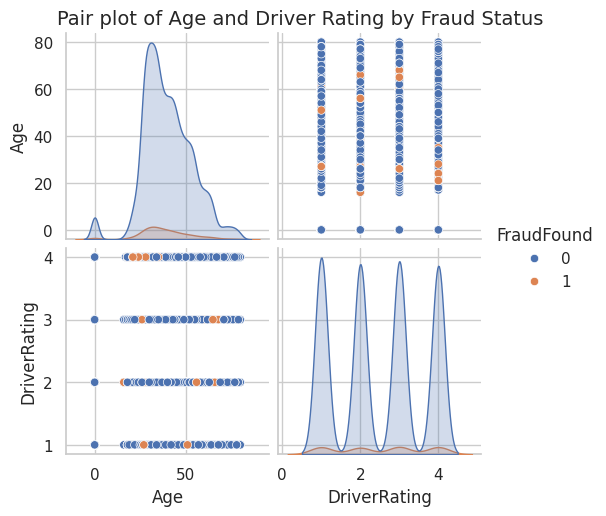

In [47]:
# Create pair plot
pairplot = sns.pairplot(
    fraud_df[["Age", "DriverRating", "FraudFound"]], hue="FraudFound")

# Plot spacing and title
pairplot.fig.suptitle("Pair plot of Age and Driver Rating by Fraud Status", fontsize=14, y=1.02)

plt.show()

In [48]:
fraud_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  PolicyNumber          15420 non-null

**1.5 Line Graphs when there is data or time**

1.5.1 Fraud Cases Over Time (by Month):

- A gradual decline in non-fraudulent claims over the observed period. 

- Fraudulent claims followed the same trajectory until around May 1995, but then started increasing, almost reaching the same point where they started by May 1996. Nevertheless, fraudulent cases remain significantly lower than non-fraudulent ones.

1.5.2 Fraud Trends by Week of the Month:

- Claims peak around the third week, with fraudulent claims following a relatively stable pattern similar to non-fraudulent claims.

- Specifically, there is a drop in both non-fraudulent and fraudulent claims from the 4th to 5th week, which may be due to shorter months or reporting patterns.

1.5.3 Fraud by Day of the Week:

- Non-fraudulent claims are highest on Monday, followed by a gradual decrease throughout the week, with another peak on Friday. 

- Fraudulent claims follow a similar but more muted pattern to non-fraudulent claims, indicating that fraud aligns with general claim activity rather than being concentrated on specific days.

- The slight dip over the weekend might be due to reduced business operations, leading to fewer reported claims overall.

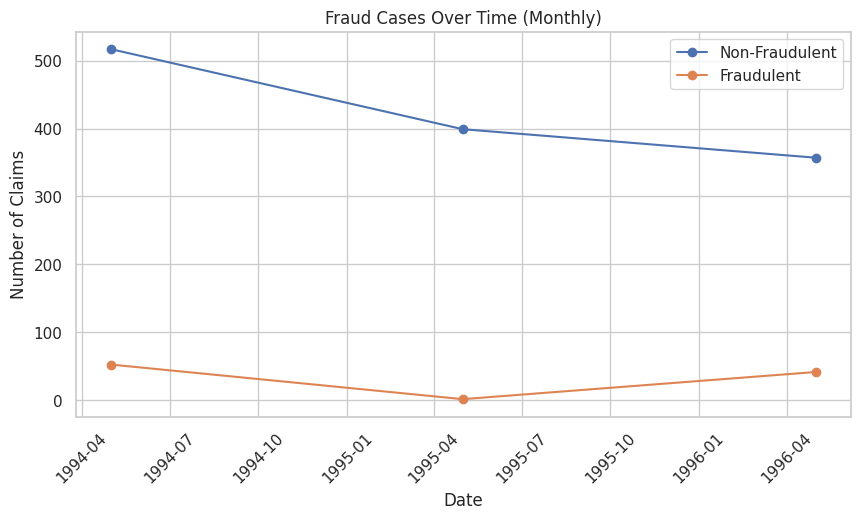

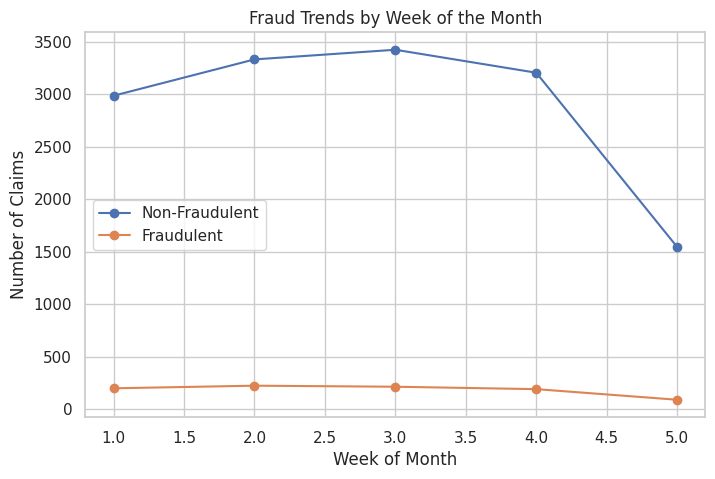

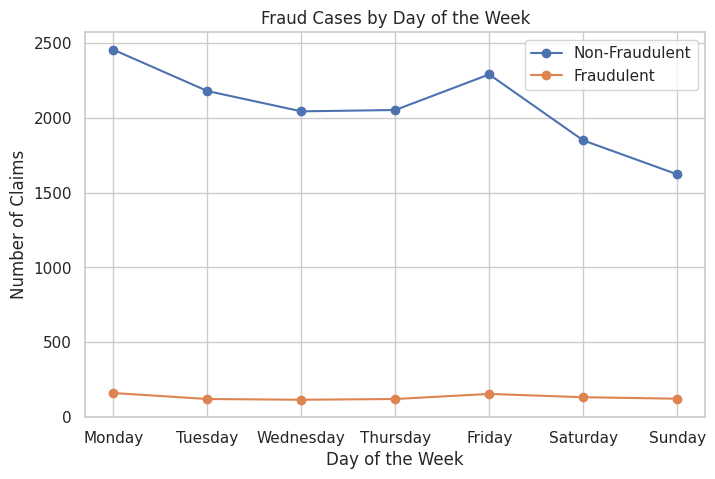

In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the dataset to ensure the graph is generated correctly
fraud_df = pd.read_csv("vehicle_insurance_fraud_detection.csv")

# Conver FraudFound to numeric (0 for non-fraudulent, 1 for fraudulent)
fraud_df["FraudFound"] = fraud_df["FraudFound"].map({"No": 0, "Yes": 1})


fraud_df["Year"] = fraud_df["Year"].astype(str)
fraud_df["Date"] = fraud_df["Year"] + "-" + fraud_df["Month"]
fraud_df["Date"] = pd.to_datetime(fraud_df["Date"], format="%Y-%B", errors='coerce')

# 1. Fraud Cases Over Time (by Month)
fraud_trend = fraud_df.groupby("Date")["FraudFound"].value_counts().unstack(fill_value=0)
fraud_trend.columns = ["Non-Fraudulent", "Fraudulent"]  # Rename for clarity

plt.figure(figsize=(10, 5))
plt.plot(fraud_trend.index, fraud_trend["Non-Fraudulent"], label="Non-Fraudulent", marker='o', linestyle='-')
plt.plot(fraud_trend.index, fraud_trend["Fraudulent"], label="Fraudulent", marker='o', linestyle='-')
plt.title("Fraud Cases Over Time (Monthly)")
plt.xlabel("Date")
plt.ylabel("Number of Claims")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# 2. Fraud Trends by Week of the Month
fraud_week_trend = fraud_df.groupby("WeekOfMonth")["FraudFound"].value_counts().unstack(fill_value=0)
fraud_week_trend.columns = ["Non-Fraudulent", "Fraudulent"]  # Rename for clarity

plt.figure(figsize=(8, 5))
plt.plot(fraud_week_trend.index, fraud_week_trend["Non-Fraudulent"], label="Non-Fraudulent", marker='o', linestyle='-')
plt.plot(fraud_week_trend.index, fraud_week_trend["Fraudulent"], label="Fraudulent", marker='o', linestyle='-')
plt.title("Fraud Trends by Week of the Month")
plt.xlabel("Week of Month")
plt.ylabel("Number of Claims")
plt.legend()
plt.grid(True)
plt.show()

# 3. Fraud by Day of the Week
fraud_day_trend = fraud_df.groupby("DayOfWeek")["FraudFound"].value_counts().unstack(fill_value=0)
fraud_day_trend.columns = ["Non-Fraudulent", "Fraudulent"]  # Rename for clarity

# Reorder days 
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
fraud_day_trend = fraud_day_trend.reindex(days_order)

plt.figure(figsize=(8, 5))
plt.plot(fraud_day_trend.index, fraud_day_trend["Non-Fraudulent"], label="Non-Fraudulent", marker='o', linestyle='-')
plt.plot(fraud_day_trend.index, fraud_day_trend["Fraudulent"], label="Fraudulent", marker='o', linestyle='-')
plt.title("Fraud Cases by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Claims")
plt.legend()
plt.grid(True)
plt.show()


### **2. Insurance claims dataset**


In [50]:
claims_df = pd.read_csv("insurance_claims.csv") 

In [51]:
claims_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

**Handling Missing Data**

This was addressed in HW4 (cells 143-149), but the same steps are repeated here to prevent any data loss when transferring the updated dataset from HW4 to HW6. An attempt to use pickle (pkl) did not yield the desired result - the data was lost. Therefore, for convenience, the steps for addressing missing data are replicated here.

In [52]:
# Check for missing values
# Since the _c39 column contains only blanks, it can be disregarded
# The authorities_contacted column has 91 missing values, which will be addressed below
claims_df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [53]:
# Considering that the dataset has 1,000 rows, the 91 missing values represent roughly 9% of the data
# To avoid losing this portion and to prevent introducing bias by assuming a response, the missing values are retained in the dataset and replaced with "Unknown"
claims_df = claims_df.assign(authorities_contacted=claims_df["authorities_contacted"].fillna("Unknown"))

# Check if any missing values remain
print("Missing values in 'authorities_contacted':", claims_df['authorities_contacted'].isna().sum())

# Display unique values to confirm "Unknown" was added
print("Unique values in 'authorities_contacted':", claims_df['authorities_contacted'].unique())


Missing values in 'authorities_contacted': 0
Unique values in 'authorities_contacted': ['Police' 'Unknown' 'Fire' 'Other' 'Ambulance']


In [54]:
# The dataset has also unkown values that are marked as "?"
# Check for "?" values in each column
missing_question_marks = (claims_df == "?").sum()

# Display only columns where "?" appears at least once
missing_question_marks = missing_question_marks[missing_question_marks > 0]

print("Columns containing '?' values:")
print(missing_question_marks)

Columns containing '?' values:
collision_type             178
property_damage            360
police_report_available    343
dtype: int64


In [55]:
# Replace the "?" with a more explicit "Unknown" or "Unknown Collision Type"
claims_df = claims_df.copy() 

claims_df["collision_type"] = claims_df["collision_type"].replace("?", "Unknown Collision Type")
claims_df["property_damage"] = claims_df["property_damage"].replace("?", "Unknown")
claims_df["police_report_available"] = claims_df["police_report_available"].replace("?", "Unknown")

# Since these three columns contain missing values but are important for analysis, they are retained and explicitly labeled as "Unknown" rather than dropped or arbitrarily filled
# This approach ensures that missing data does not introduce unintended biases while preserving useful information for fraud detection
# Also, the missing value rows cannot be dropped because they represen a large part of the dataset

In [56]:
# Display unique values to confirm the replacements were successful
print("Unique values in 'collision_type':", claims_df["collision_type"].unique())
print("Unique values in 'property_damage':", claims_df["property_damage"].unique())
print("Unique values in 'police_report_available':", claims_df["police_report_available"].unique())

Unique values in 'collision_type': ['Side Collision' 'Unknown Collision Type' 'Rear Collision'
 'Front Collision']
Unique values in 'property_damage': ['YES' 'Unknown' 'NO']
Unique values in 'police_report_available': ['YES' 'Unknown' 'NO']


In [57]:
# Policy_number appears to be a customer identifier, as its count matches the total number of rows in the dataset
claims_df['policy_number']

0      521585
1      342868
2      687698
3      227811
4      367455
        ...  
995    941851
996    186934
997    918516
998    533940
999    556080
Name: policy_number, Length: 1000, dtype: int64

In [58]:
# Each policy_number is unique, no duplicates found
claims_df[claims_df['policy_number'].duplicated(keep=False)]

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39


In [59]:
# The replacement was successful
claims_df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,Unknown,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,Unknown,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,Unknown,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


**2.1 Correlations between pairs of variables**

This dataset is better suited for identifying correlations between numerical variables. Scatter plots are particularly useful for revealing patterns related to claim amounts. In this way, this dataset makes up for the lack of opportunities to create scatter plots in the **Vehicle Insurance Fraud Detection dataset**.

As with the previous dataset, a heatmap is used to establish correlations between numerical variables. However, it does not seem particularly valuable for the following reasons:

- Total claim amount is highly correlated with injury, property, and vehicle claims, suggesting redundancy among these variables because it is likely that Total Claim Amount is a sum of these components.

- Months as a customer and age show a strong correlation (0.92), which indicates that one might be redundant in predictive models.

- The number of vehicles involved has weak correlations with most variables, meaning it may not be a strong predictor on its own.

- No single variable shows a strong correlation with fraud. This is not surprising because fraud detection likely depends on a combination of multiple factors rather than a single numerical variable.

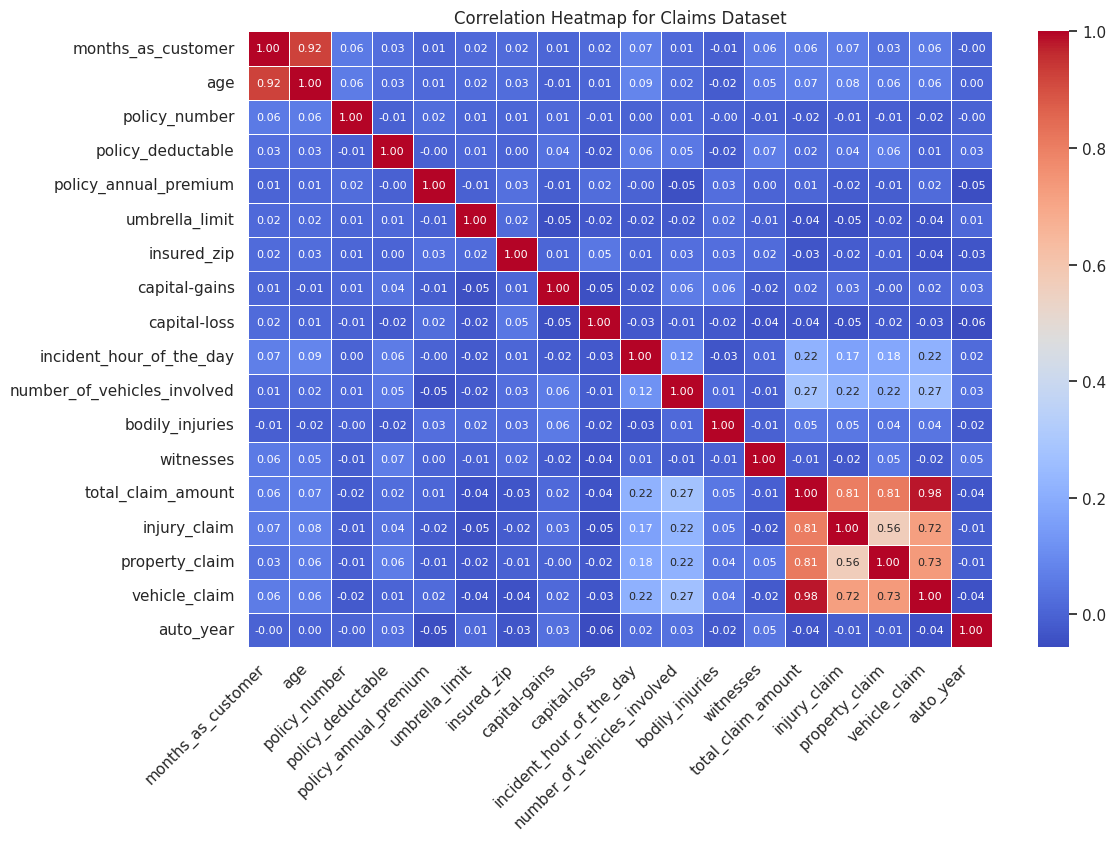

In [60]:
# Create the figure before plotting
plt.figure(figsize=(12, 8))  # Set figure size

# Generate heatmap directly from claims_df
sns.heatmap(
    claims_df.select_dtypes(include=['int64', 'float64']).drop(columns=["_c39"], errors="ignore").corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    annot_kws={"size": 8}) 

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0) 

plt.title("Correlation Heatmap for Claims Dataset")

plt.show()


**2.2 Grouped histograms**

In HW4 (cell 155), two grouped histograms showed correlations between fraudulent claims and policy annual premium, as well as between fraudulent claims and total claim amount. Here, the grouped histogram provides some insight, but the data is best represented in scatter plot form (see 2.3.1).

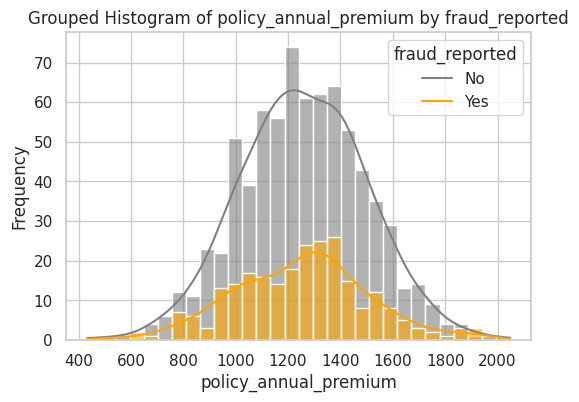

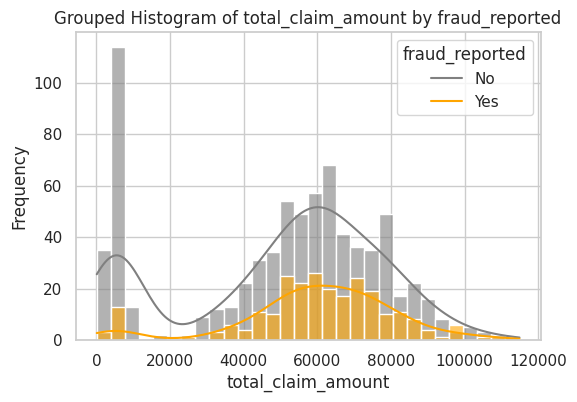

In [61]:
# Convert fraud_reported to string for visualization
claims_df["fraud_reported"] = claims_df["fraud_reported"].astype(str)

# Define numerical columns to plot
numerical_cols = ["policy_annual_premium", "total_claim_amount"]
group_col = "fraud_reported" 

# Draw grouped histograms
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=claims_df, x=col, hue=group_col, kde=True, bins=30, alpha=0.6, palette={"Y": "orange", "N": "gray"})
    plt.title(f"Grouped Histogram of {col} by {group_col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.legend(labels=[ "No", "Yes"], title=group_col)
    plt.show()

**2.3 Scatter plots**

2.3.1 Scatter Plot of Total Claim Amount vs. Policy Annual Premium

- The histograms clearly show where data points are concentrated, but they do not provide the full picture.

- While the following scatter plots do not show a clear linear relationship, they reveal two clusters worth analyzing. The first scatter plot shows a dense concentration of claims under $10,000, which is expected since most insurance claims fall within the lower range. However, what stands out is that both small claims (below $10,000) and large claims ($40,000 to $80,000) are concentrated around policy annual premiums of $1,000–$1,500. In contrast, there is a noticeable gap in claims between $10,000 and $40,000, where data points are much sparser.

- The second graph, which filters data by fraud_reported, reveals that suspicious claims tend to follow a similar pattern - concentrated around policy premiums of $1,000–$1,500 and claim amounts between $40,000 and $80,000. Fraudulent claims in the lower range ($10,000 and below) appear more spread out across different premium levels, but they are still generally kept under $10,000.

- Identifying these patterns is useful because it highlights potential red flags for fraud detection. The concentration of fraudulent claims in specific premium and claim amount ranges suggests that further investigation into these policyholders or claim circumstances may be warranted. 


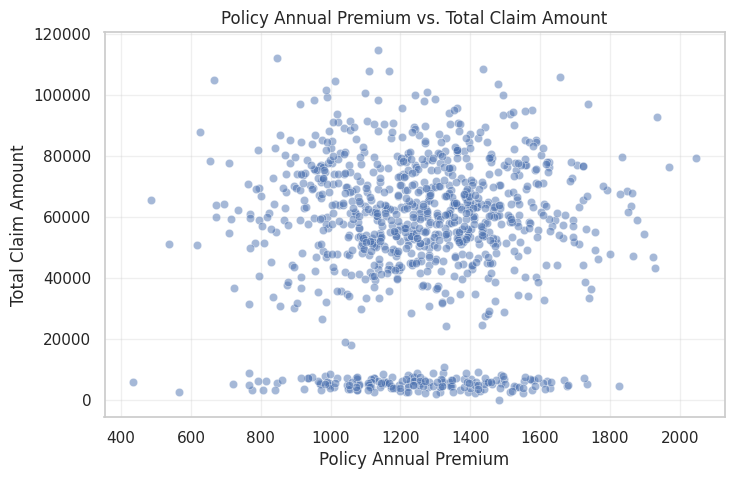

In [62]:
# Scatter plot for all data points
plt.figure(figsize=(8, 5))
sns.scatterplot(data=claims_df, x="policy_annual_premium", y="total_claim_amount", alpha=0.5)

# Labels and title
plt.xlabel("Policy Annual Premium")
plt.ylabel("Total Claim Amount")
plt.title("Policy Annual Premium vs. Total Claim Amount")

plt.grid(alpha=0.3)
plt.show()

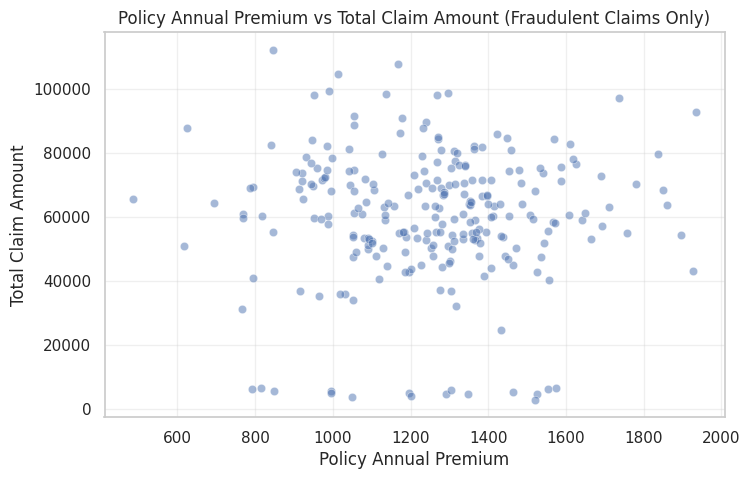

In [63]:
# Create scatter plot for cases when fraud was reported
fraud_only = claims_df[claims_df["fraud_reported"] == "Y"]

# Scatter plot for Total Claim Amount vs. Policy Annual Premium
plt.figure(figsize=(8, 5))
sns.scatterplot(data=fraud_only, x="policy_annual_premium", y="total_claim_amount", alpha=0.5)

# Labels and title
plt.xlabel("Policy Annual Premium")
plt.ylabel("Total Claim Amount")
plt.title("Policy Annual Premium vs Total Claim Amount (Fraudulent Claims Only)")

plt.grid(alpha=0.3)
plt.show()

2.3.2 Scatter plot for Total Claim Amount vs. Incident Hour of the Day

- Since the dataset includes additional numerical variables, these extra scatter plots are drawn to uncover hidden patterns.

- Two scatter plots revealed an unexpected pattern. While incident hours generally appear random and unrelated to total claim amounts, there is a noticeable cluster of claims under $10,000 occurring between approximately 3 AM and 9 AM.

- This pattern becomes clearer in the second scatter plot which shows only cases when fraud was reported. Here, incidents are highly concentrated between 3 AM and 8 AM, with most claims falling between $2,000 and $10,000.

- This finding is important because it suggests a non-random pattern in some fraudulent claims, particularly during early morning hours with mid-range claim amounts. If fraud incidents are disproportionately occurring between 3 AM and 8 AM with claims under $10,000, it could indicate a strategic ploy used by fraudsters, warranting further investigation by insurers.

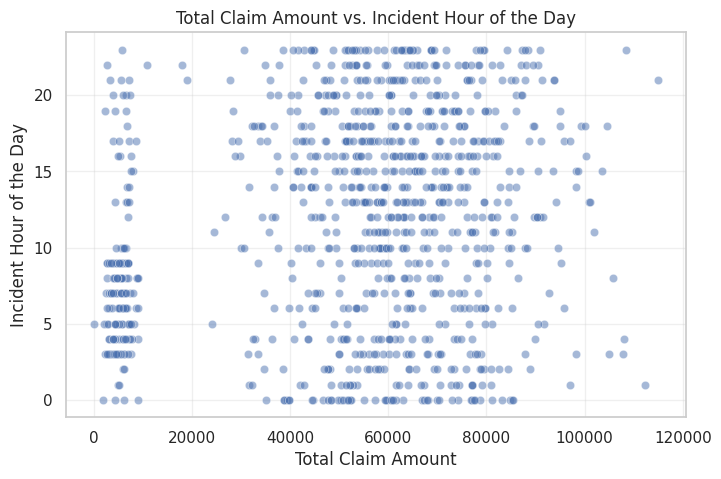

In [64]:
# Create scatter plot for all data points
plt.figure(figsize=(8, 5))
sns.scatterplot(data=claims_df, x="total_claim_amount", y="incident_hour_of_the_day", alpha=0.5)

# Labels and title
plt.xlabel("Total Claim Amount")
plt.ylabel("Incident Hour of the Day")
plt.title("Total Claim Amount vs. Incident Hour of the Day")

plt.grid(alpha=0.3)
plt.show()

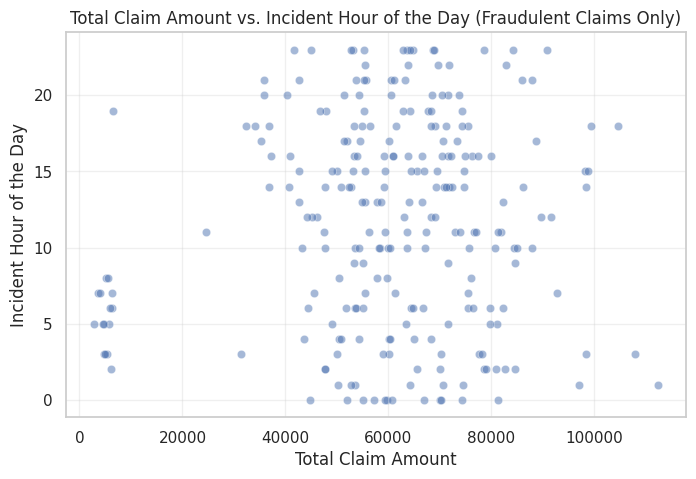

In [65]:
# Create scatter plot for incidents when fraud was reported
fraud_only = claims_df[claims_df["fraud_reported"] == "Y"]

# Scatter plot for Total Claim Amount vs. incident_hour_of_the_day
plt.figure(figsize=(8, 5))
sns.scatterplot(data=fraud_only, x="total_claim_amount", y="incident_hour_of_the_day", alpha=0.5)

# Labels and title
plt.xlabel("Total Claim Amount")
plt.ylabel("Incident Hour of the Day")
plt.title("Total Claim Amount vs. Incident Hour of the Day (Fraudulent Claims Only)")

plt.grid(alpha=0.3)
plt.show()

**2.4 Pair plots**

2.4.1 Financial Claim Amounts:

- Strong positive correlations exist between total claim amount, injury claim, property claim, and vehicle claim. This correlation was evident in the heatmap, likely because total claim amount is the sum of these components.

- The diagonal patterns in the scatter plots suggest that claim amounts are not randomly distributed but instead follow structured or tiered values. This likely happens because insurance policies have predefined payout limits for different types of claims (injury, property, vehicle). Standardized claim amounts may also result from company policies, legal guidelines, or rounding conventions

- These relationships confirm expected dependencies rather than revealing new insights.

2.4.2 Age, Policy Premium, and Total Claim Amount

- No strong linear relationships between age and total claim amount, suggesting that age alone isn’t a major factor in claim size.

- Policy premium also shows little direct correlation with total claim amount, but in 2.3.1, the scatter plot helped uncover a pattern through dot concentrations around lower values.

- Overall, this pair plot does not reveal new insights.

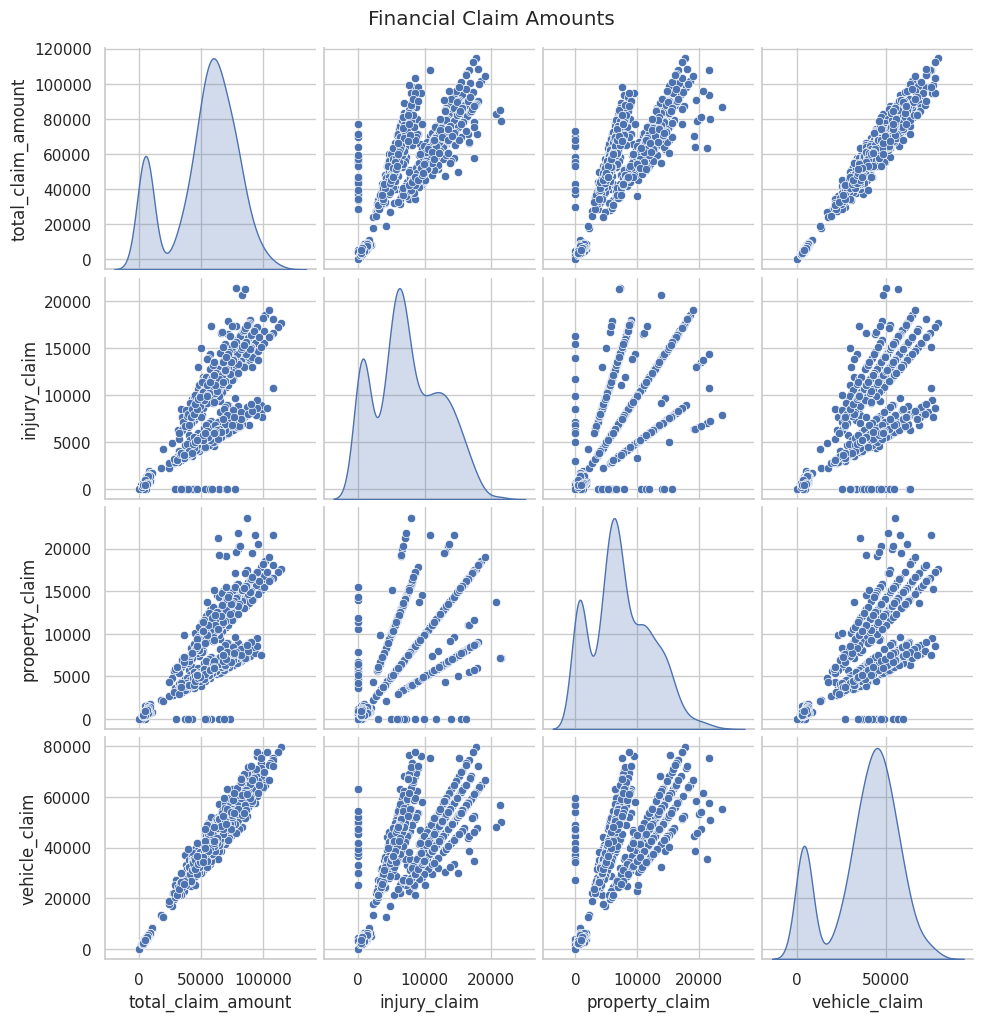

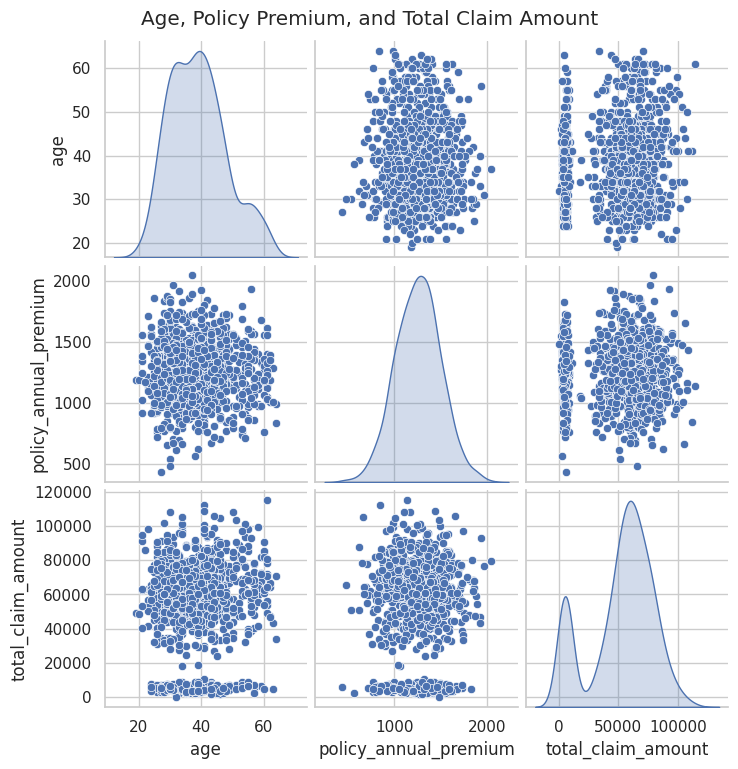

In [66]:
# Pairplot 1: Financial Claim Amounts
pairplot_cols_1 = ["total_claim_amount", "injury_claim", "property_claim", "vehicle_claim"]
sns.pairplot(claims_df[pairplot_cols_1], diag_kind="kde")
plt.suptitle("Financial Claim Amounts", y=1.02)
plt.show()


# Pairplot 2: Age, Policy Premium, and Claim Amount
pairplot_cols_2 = ["age", "policy_annual_premium", "total_claim_amount"]
sns.pairplot(claims_df[pairplot_cols_2], diag_kind="kde")
plt.suptitle("Age, Policy Premium, and Total Claim Amount", y=1.02)
plt.show()

**2.5 Line graphs**

2.5.1 Fraudulent vs. Non-Fraudulent Claims Over Time

- This graph is useful for identifying trends, anomalies, and seasonal variations in claim activity. 

- In some periods, fraudulent claims follow the same trajectory as non-fraudulent ones, while at other times, they appear to behave independently. 

- These variations could indicate shifts in fraud detection efforts or external factors influencing fraud activity.

2.5.2  Average Claim Amount Per Day

- This graph highlights fluctuations in payout sizes over time. The presence of sharp peaks suggests that certain days had unusually high claim amounts, possibly due to large individual claims or even potential fraud cases, considering the concentration of data points observed in the 2.3.1 scatter plot.
 
- While no clear long-term trend emerges, the variability in claim amounts suggests that some days experience significantly higher payouts than others, which may potentially warrant further investigation.

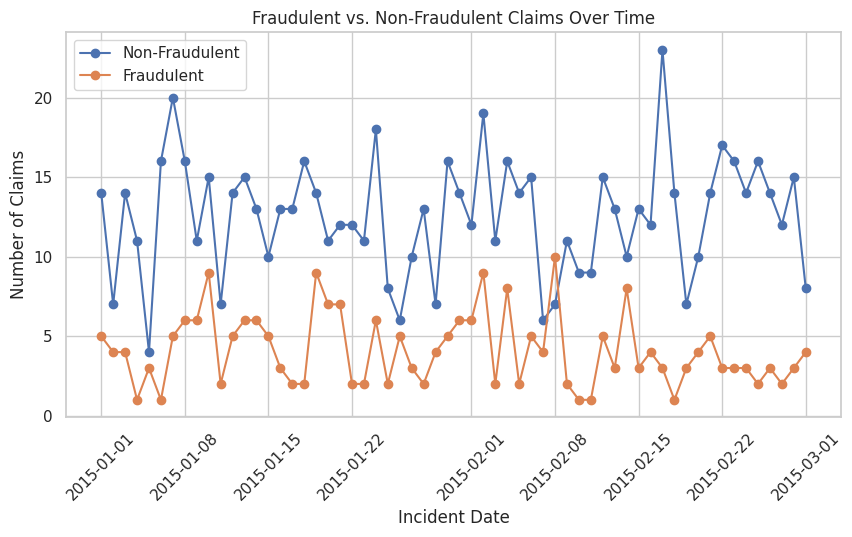

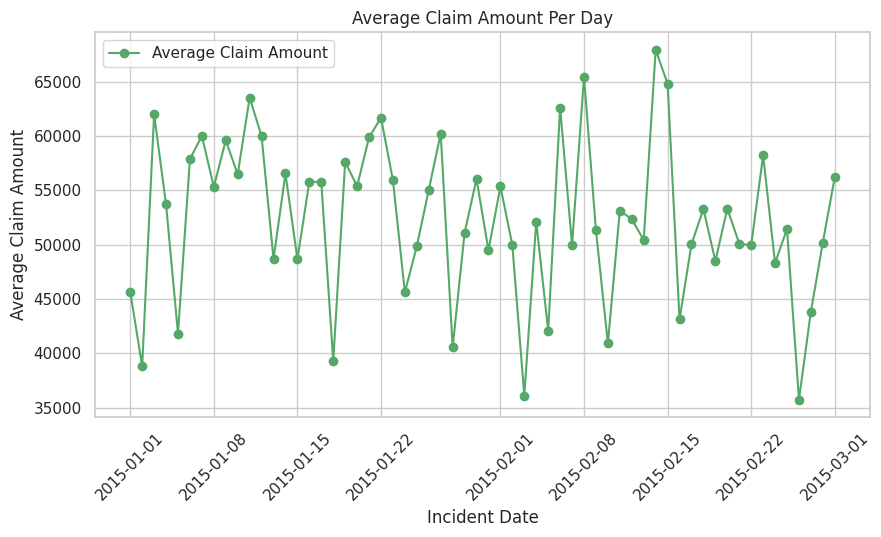

In [67]:
import matplotlib.pyplot as plt
import pandas as pd

claims_df["incident_date"] = pd.to_datetime(claims_df["incident_date"], errors='coerce')

# 1. Fraudulent vs. Non-Fraudulent Claims Over Time
claims_df["fraud_reported"] = claims_df["fraud_reported"].map({"N": 0, "Y": 1}) 

fraud_trend = claims_df.groupby("incident_date")["fraud_reported"].value_counts().unstack(fill_value=0)
fraud_trend.columns = ["Non-Fraudulent", "Fraudulent"]

plt.figure(figsize=(10, 5))
plt.plot(fraud_trend.index, fraud_trend["Non-Fraudulent"], label="Non-Fraudulent", marker='o', linestyle='-')
plt.plot(fraud_trend.index, fraud_trend["Fraudulent"], label="Fraudulent", marker='o', linestyle='-')
plt.title("Fraudulent vs. Non-Fraudulent Claims Over Time")
plt.xlabel("Incident Date")
plt.ylabel("Number of Claims")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# 2. Average Claim Amount Per Day 
avg_claim_trend = claims_df.groupby("incident_date")["total_claim_amount"].mean()

plt.figure(figsize=(10, 5))
plt.plot(avg_claim_trend.index, avg_claim_trend, marker='o', linestyle='-', color='g', label="Average Claim Amount")
plt.title("Average Claim Amount Per Day")
plt.xlabel("Incident Date")
plt.ylabel("Average Claim Amount")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

### Conclusions for Vehicle Insurance Fraud Detection Dataset:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!

**Answer:** Yes, this dataset is comprehensive and well-structured, making it suitable for analysis. It contains a mix of numerical and categorical features that were compared against the FraudFound column to identify potential fraud patterns. The data appears complete, as it does not have missing values or inconsistencies, which increases its usability for modeling and insights. In fact, further visualizations this week revealed even richer patterns than expected. For example, while the histogram grouping RepNumber and Fraud provided valuable insight in Week 4, the bar graph showing Fraud Rate by RepNumber helped identify which representatives encountered more fraudulent claims. These findings indicate that the dataset has strong potential for detecting fraud trends.

- Do you see any outliers?  (Data points that are far from the rest of the data).

**Answer:** Yes, there are clear outliers in the dataset, which were first identified in Week 4. One notable outlier is Age = 0, which is unexpected and may indicate a data entry error, misrepresentation, or an anomaly in fraud claims. This week, three representatives stood out as outliers, handling more fraudulent claims compared to their colleagues. Another example was revealed through a line graph, which showed that claims peaked on Monday, gradually decreased throughout the week, and then spiked again on Friday. These patterns suggest potential factors influencing fraudulent claims, such as reporting behaviors or operational practices.

- Are any data items highly correlated with each other, suggesting that they are redundant?

**Answer:** Yes, the heatmap showed overall weak correlations between most numerical variables. However, PolicyNumber and Year had a perfect positive correlation, which was expected since newer policies receive higher numbers. This makes PolicyNumber redundant, as it does not provide additional insight beyond what the Year variable already captures.

- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?

**Answer:** The mentioned above line graph, which showed that claims peaked on Monday, gradually decreased throughout the week and then spiked again on Friday. This pattern indicates potential factors influencing fraudulent claims, such as reporting behaviors or operational practices. However, if this pattern changes over time, such as claim peaks shifting to different days, it could indicate data drift, making past trends less reliable for future comparisons.

- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)

**Answer:** Younger policyholders might show a higher fraud rate, but this could be due to factors like less driving experience, higher-risk vehicles, or financial instability, rather than age itself. One clear example is the Age = 0 anomaly, where claimants with an age of zero had a significantly higher fraudulent claim rate. This is unlikely to be a real representation of their age, suggesting data entry errors, missing values, or intentional fraud misrepresentation.

### Conclusions for Vehicle Insurance Fraud Detection Dataset:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!

**Answer:** The dataset appears comprehensive and contains a mix of numerical and categorical variables relevant to insurance claims and fraud detection. The fraud_reported column provides a clear target variable, and the dataset includes important financial and policy-related details that can be useful for identifying fraud patterns.

- Do you see any outliers?  (Data points that are far from the rest of the data).

**Answer:** Yes, the dataset has high-end outliers in policy_premiums and claim_amounts. These may represent legitimate large claims but could also indicate potential fraudulent cases. The scatter plots showed a noticeable concentration of claims in lower amounts, under $10,000, which is expected since most insurance claims fall within the lower range. However, what stands out is that both small claims (below $10,000) and large claims ($40,000 to $80,000) are concentrated around policy annual premiums of $1,000–$1,500. In contrast, there is a noticeable gap in claims between $10,000 and $40,000, where data points are much sparser. 

Another observation emerged when analyzing incident hours: fraudulent claims had a noticeable concentration between 3 AM and 8 AM. This is unusual since most accidents typically occur during busier hours, making these early-morning fraud cases stand out. This pattern could indicate staged accidents, delayed reporting, or specific fraudulent behaviors occurring during off-peak hours.

- Are any data items highly correlated with each other, suggesting that they are redundant?

**Answer:** Yes, the heatmap showed weak correlations overall, except for some expected relationships. Total claim amount is highly correlated with injury, property, and vehicle claims, which makes sense because it is their sum. 

- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?

**Answer:** The line plots were useful for potentially identifying patterns in fraud activity and detecting potential shifts in claim behavior over time. In some periods, fraudulent claims closely follow the trajectory of non-fraudulent ones, suggesting that fraud occurs at a relatively consistent rate alongside normal claims. However, at other times, fraudulent claims diverge, either spiking independently or declining while non-fraudulent claims remain stable. Despite these variations, there is no strong evidence of data drift that would invalidate comparisons over time. The overall fraud rate does not show a clear increasing or decreasing trend, meaning that while short-term fluctuations exist, the broader fraud patterns remain relatively stable. As a result, past fraud trends can still be used for analysis without concern that the data has fundamentally changed over time.

- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)

**Answer:** Althought it was found that fraudulent claims had a noticeable concentration between 3 AM and 8 AM, which is unusual, this might not mean fraudsters only operate during these hours. For example, fraudsters could delay reporting to avoid suspicion.

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 86-98 of the Storytelling With Data book as best you can.  (The second half of chapter three).  You do not have to get the exact data values right, just the overall look and feel.

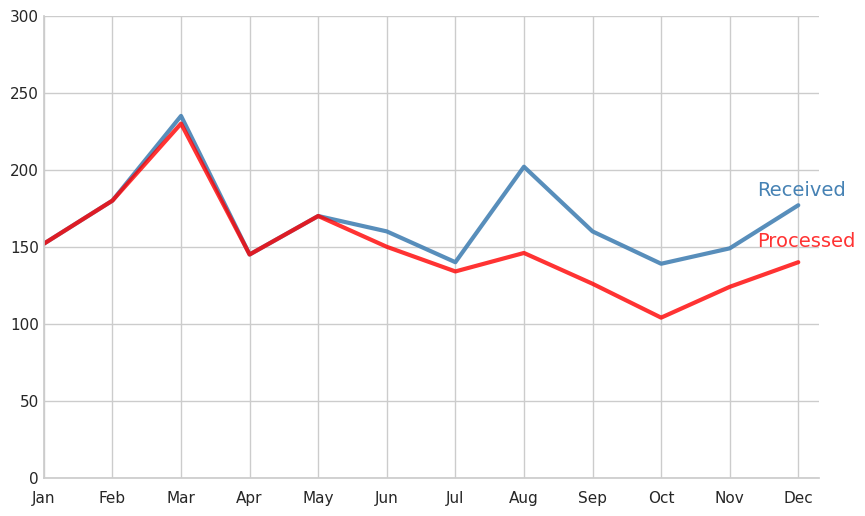

In [68]:
import numpy as np

months = np.array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
XYZ_Tickets = pd.DataFrame(months)
XYZ_Tickets.columns = ['Month']
XYZ_Tickets['Received'] = pd.DataFrame([152,180,235,145,170,160,140,202,160,139,149,177])
XYZ_Tickets['Processed'] = pd.DataFrame([152,180,230,145,170,150,134,146,126,104,124,140])
XYZ_Tickets

fig, ax = plt.subplots(figsize=(10,6))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.plot(XYZ_Tickets['Month'], XYZ_Tickets['Received'], alpha=0.9, color='steelblue', linewidth=3)
ax.plot(XYZ_Tickets['Month'], XYZ_Tickets['Processed'], alpha=0.8, color='red', linewidth=3)


plt.ylim(0, 300)  # Match y-axis range
plt.xlim(-0, 11.3)  # Ensure January aligns with y-axis

ax.tick_params(axis='y', direction='in', length=5, width=1)

plt.text(0.92, 0.61, "Received",  fontsize=14, color='steelblue', transform=plt.gca().transAxes)
plt.text(0.92, 0.50, "Processed", fontsize=14, alpha=0.8, color='red', transform=plt.gca().transAxes)

plt.show()